In [1]:
from Per import *


#Batch simulations
def simulation(series,name_serie,rN,rm,rb):
    
    import time
    import pandas as pd
    
    res=[]
    for nn in rN:
        for name,serie in zip(name_serie,series):
            serie=serie[:int(round(nn))]
            for m in rm:
                for b in rb:
                    time0=time.time()
                    res.append((name,len(serie),b,m,PE(serie,m,b,oktie=False),len(serie)/np.math.factorial(m),time.time()-time0))

        print(res[-1])
    res_m=np.array(res)
    lms=pd.DataFrame(res_m,columns=['serie','N','b','m','PE','N/m!','t'])
    lms['b']=lms['b'].astype(np.integer)
    lms['m']=lms['m'].astype(np.integer)
    lms['PE']=lms['PE'].astype(np.float)
    lms['N/m!']=lms['N/m!'].astype(np.float)
    lms['t']=lms['t'].astype(np.float)
    lms['H']=np.log(lms['m'].apply(np.math.factorial))-lms['PE']
    lms['N']=(lms['N']).astype(np.integer)
    return lms

def select(sec,data):
    res=data.copy()
    for col,cond in sec:
        res=res[res[col] == cond]
    return res
        

In [2]:

x = [6,9,11,12,8,13,5]
(PE(x,3,1,okfr=True))

(1.0549201679861442, {(0, 1, 2): 2, (1, 2, 0): 2, (1, 0, 2): 1})

In [3]:
N=[int(1e5)]
rm=[3,4,5,6,7,8,9]
#b=range(1,101)

In [4]:
series=[np.random.uniform(0,255,N)]
series.append(np.random.randint(0,255,N))
#series.append(series[-1]+np.random.uniform(1e-7,1e-6,series[-1].shape))
name_serie=['float','int']

In [5]:
res=[]
for m in rm:
    for b in range(1,101):
        res.append([name_serie[0],m,b,PE(series[0],m,b)])
        res.append([name_serie[1]+'_order',m,b,PE(series[1],m,b,oktie='order')])

        res.append([name_serie[1]+'_same',m,b,PE(series[1],m,b,oktie='same')])

        res.append([name_serie[1]+'_drop',m,b,PE(series[1],m,b,oktie='drop')])
        

In [6]:
lmb=pd.DataFrame(res,columns=['serie','m','tau','PE'])

<IPython.core.display.Javascript object>


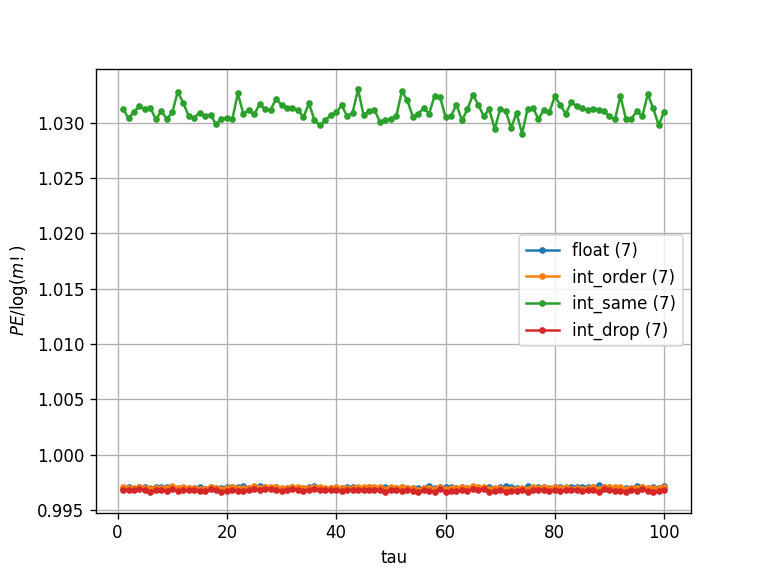

In [7]:
legend=[]
m=7
for serie in lmb.serie.unique():
    
    legend.append('{} ({})'.format(serie,m))
    sec=select([('serie',serie),('m',m)],lmb)
    X=sec['tau']
    y=sec['PE']/np.log(np.math.factorial(m))
    plt.plot(X,y,marker='.')
        
plt.legend(legend)
plt.ylabel('$PE/\log(m!)$')
plt.xlabel('tau')
plt.grid()
        

In [8]:
lmb.groupby(['serie','m'])['PE'].describe()


count       mean       std        min        25%        50%  \
serie     m                                                                
float     3  100.0   1.791743  0.000013   1.791696   1.791738   1.791748   
          4  100.0   3.177950  0.000040   3.177840   3.177928   3.177956   
          5  100.0   4.786912  0.000092   4.786668   4.786861   4.786922   
          6  100.0   6.575665  0.000227   6.574968   6.575574   6.575682   
          7  100.0   8.499801  0.000619   8.498199   8.499360   8.499779   
          8  100.0  10.379776  0.001739  10.376142  10.378682  10.379597   
          9  100.0  11.332588  0.001497  11.329426  11.331407  11.332686   
int_drop  3  100.0   1.791743  0.000013   1.791687   1.791739   1.791748   
          4  100.0   3.177960  0.000035   3.177821   3.177941   3.177968   
          5  100.0   4.786909  0.000090   4.786703   4.786852   4.786917   
          6  100.0   6.575480  0.000221   6.574944   6.575347   6.575480   
          7  100.0   8.497584  0.000632   8.495978   8.497107   8.497669   
          8  100.0  10.350447  0.002174  10.346513  10.348788  10.350298   
          9  100.0  11.212497  0.003226  11.204735  11.210455  11.212606   
int_order 3  100.0   1.791724  0.000022   1.791633   1.791714   1.791730   
          4  100.0   3.177917  0.000050   3.177775   3.177893   3.177921   
          5  100.0   4.786850  0.000114   4.786526   4.786775   4.786859   
          6  100.0   6.575569  0.000234   6.574916   6.575418   6.575578   
          7  100.0   8.499618  0.000575   8.497997   8.499251   8.499653   
          8  100.0  10.379394  0.001776  10.374978  10.378146  10.379329   
          9  100.0  11.332300  0.001548  11.328638  11.331368  11.332122   
int_same  3  100.0   1.855725  0.002078   1.851501   1.854258   1.855477   
          4  100.0   3.298693  0.003290   3.290357   3.296313   3.298170   
          5  100.0   4.977842  0.004563   4.965863   4.975063   4.977579   
          6  100.0   6.841168  0.005894   6.825177   6.837262   6.841061   
          7  100.0   8.789687  0.006542   8.772374   8.785491   8.789576   
          8  100.0  10.566949  0.004391  10.557001  10.564118  10.566885   
          9  100.0  11.375573  0.001640  11.371662  11.374376  11.375719   

                   75%        max  
serie     m                        
float     3   1.791753   1.791758  
          4   3.177979   3.178017  
          5   4.786977   4.787110  
          6   6.575816   6.576092  
          7   8.500218   8.501396  
          8  10.380897  10.384133  
          9  11.334080  11.335173  
int_drop  3   1.791752   1.791758  
          4   3.177985   3.178023  
          5   4.786975   4.787145  
          6   6.575648   6.576042  
          7   8.498026   8.498952  
          8  10.352018  10.355721  
          9  11.214689  11.219763  
int_order 3   1.791739   1.791753  
          4   3.177954   3.178001  
          5   4.786926   4.787102  
          6   6.575750   6.576088  
          7   8.500036   8.501066  
          8  10.380480  10.384196  
          9  11.333378  11.335677  
int_same  3   1.857200   1.861058  
          4   3.300688   3.307117  
          5   4.980693   4.989328  
          6   6.844280   6.855519  
          7   8.792504   8.806646  
          8  10.568953  10.577415  
          9  11.376899  11.379782

<IPython.core.display.Javascript object>


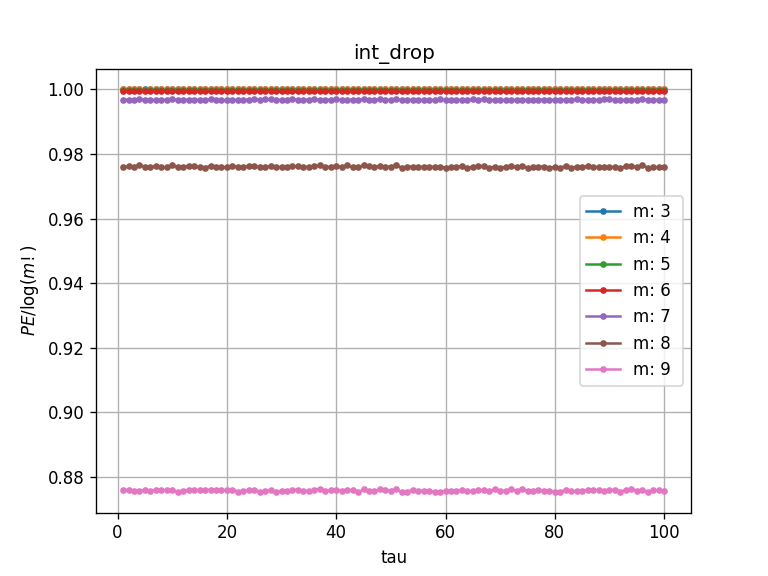

In [12]:
serie=lmb.serie.unique()[3]

legend=[]
m=9
for m in lmb.m.unique():
    
    legend.append('m: {} '.format(m))
    sec=select([('serie',serie),('m',m)],lmb)
    X=sec['tau']
    y=sec['PE']/np.log(np.math.factorial(m))
    plt.plot(X,y,marker='.')
        
plt.legend(legend)
plt.ylabel('$PE/\log(m!)$')
plt.xlabel('tau')
#plt.yscale('log')
plt.title('{}'.format(serie))
plt.grid()

It seems that the "natural" way for solve ties is _order_

### $\tau$
If we think the embedded delay, $\tau$, as an operation on the time serie $S(N)=x_1, x_2, ...., x_N$ it results in a set of $\tau$ disjoint time series $\{\sigma_i=x_i,x_{i+\tau},x_{i+2\tau},..., x_{i+\eta\tau}\} $ where $\lfloor \frac{N}{\tau}   \rfloor= \eta$, is the length of $\sigma$ time serie and $i \in [0,1,...,\tau-1]$.  
If $\Phi_m$ is the empirical distribution function of patterns associated to a time serie $\sigma$ and embedded dimension $m$, $\Phi_m(\sigma)$ then we can define the empirical mean of $\Phi_m$ as $<\Phi_m>= \frac{1}{\tau}\sum_{i=1}^\tau\Phi_m(\sigma_i)$ and compute $PE_{m,1}(<\Phi_m>)$ in the usual way. This preserves the sample size.  
Other approach is compute  $PE_{m,1}(\sigma_i)$ for each element of the set and promediate results $\frac{1}{\tau} \sum_{i=1}^\tau PE_{m,1}(\sigma_i)$. This reduces the effective sample size to $\lfloor \frac{N}{\tau} \rfloor$   

If we accept that   $\frac{N}{m!}>=1$ for a valid calculation then $\frac{N}{\tau m!} \geq 1$ for $\tau>1$ and $\tau \leq  \lfloor \frac{N}{m!} \rfloor$

The question is how compares $\frac{1}{\tau} \sum_{i=1}^\tau PE_{m,1}(\sigma_i)$ and $PE_{m,1}(<\Phi_m>)$

In [21]:
U=np.random.normal(0,1,int(1e6))

def split(U,tau):
    res=[]
    for i in range(tau):
        res.append(U[i::tau])
    return res

In [22]:
res=[]
m=7
for t in range(1,101):


    p=[]
    fr={}
    for s in split(U,t):
        h,q=PE(s,m,1,okfr=True)
        p.append(h)
        for key in q.keys():
            fr[key]=fr.get(key,0)+q[key]
    fq=np.array(list(fr.values()))
    fq=fq/fq.sum()

    res.append([t,sum(p)/len(p),-np.sum(fq*np.log(fq)),PE(U,m,t)])


Lets stand _tau_ for the embedded delay, _meanPE_ for $\frac{1}{\tau} \sum_1^\tau PE_{m,\tau}(\sigma_i)$, _meanPHI_ for $PE_{m,1}(<\Phi_m>)$ and _PEmb_ for the value computed with the algorithm _PE(serie,m,tau)_

In [23]:
lmb=pd.DataFrame(res,columns=['tau','meanPE','meanPHI','PEmb'])
lmb.describe()

,tau,meanPE,meanPHI,PEmb
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,8.386169,8.522635,8.522635
std,29.011492,0.083777,0.000049,0.000049
min,1.000000,8.238602,8.522507,8.522506
25%,25.750000,8.314811,8.522604,8.522605
50%,50.500000,8.390102,8.522640,8.522639
75%,75.250000,8.458583,8.522666,8.522668
max,100.000000,8.522705,8.522735,8.522735


R²:  0.9999490512182004
error= 0.002714895407065987 + -0.0024998130607716716·tau + -3.824342594370995e-06·tau²


<IPython.core.display.Javascript object>


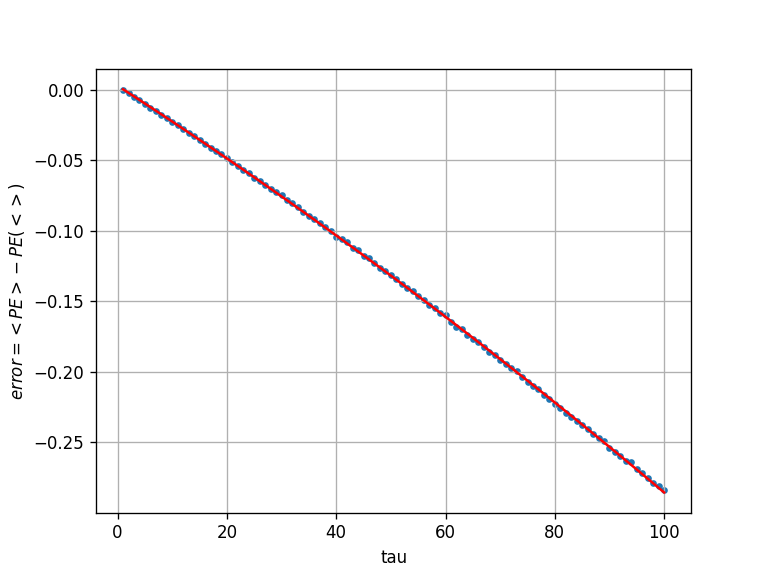

In [24]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
X=np.array([lmb.tau,lmb.tau*lmb.tau]).transpose()#np.array(lmb['tau']).reshape(-1,1)
y=lmb['meanPE']-lmb['meanPHI']
model.fit(X,y)
print('R²: ',model.score(X,y))
print('error= {} + {}·tau + {}·tau²'.format(model.intercept_,model.coef_[0],model.coef_[1]))
pred=model.predict(X)

plt.scatter(lmb['tau'],lmb['meanPE']-lmb['meanPHI'],marker='.')
plt.plot(lmb['tau'],pred,color='red')
plt.ylabel('$error=<PE>-PE(<>)$')
plt.xlabel('tau')
plt.grid()

<IPython.core.display.Javascript object>


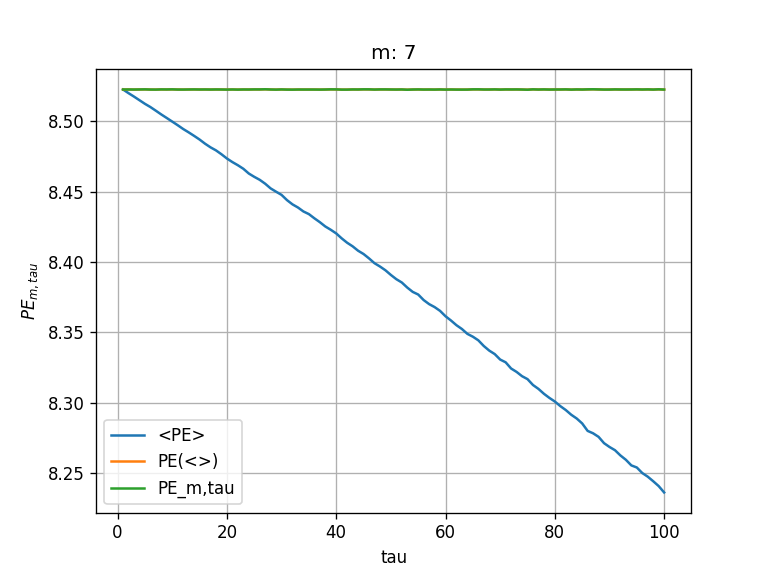

In [19]:
plt.plot(lmb.tau,lmb.meanPE)
plt.plot(lmb.tau,lmb.meanPHI)
plt.plot(lmb.tau,lmb.PEmb)
plt.ylabel('$PE_{m,tau}$')
plt.xlabel('tau')
plt.title('m: {}'.format(m))
plt.legend(['<PE>','PE(<>)','PE_m,tau'])
plt.grid()

<IPython.core.display.Javascript object>


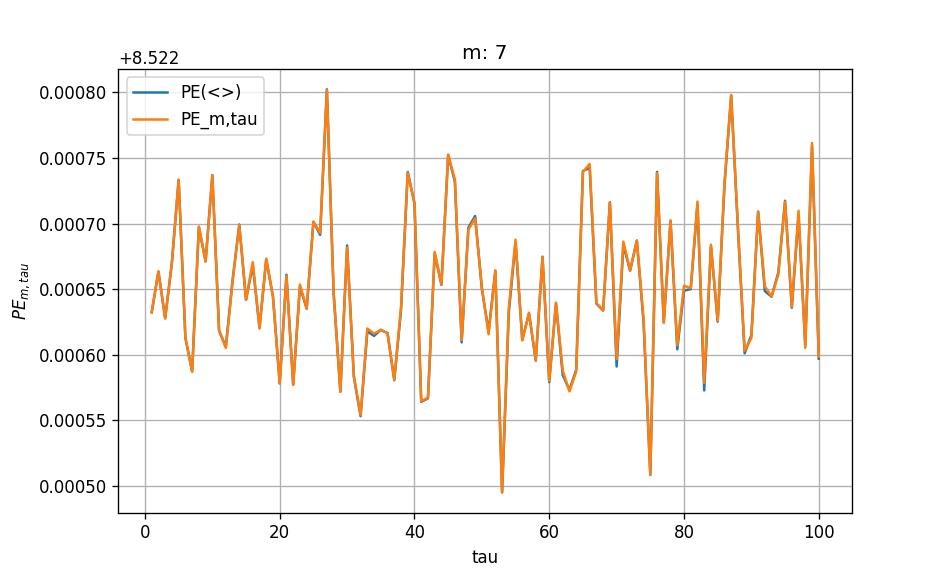

In [20]:
#plt.plot(lmb.tau,lmb.meanPE)
plt.plot(lmb.tau,lmb.meanPHI)
plt.plot(lmb.tau,lmb.PEmb)
plt.ylabel('$PE_{m,tau}$')
plt.xlabel('tau')
plt.title('m: {}'.format(m))
plt.legend(['PE(<>)','PE_m,tau'])
plt.grid()

It seems that the limits are around 3·10⁻⁴ nats.

